Hola **Samuel**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
    <b>Respuesta:</b> 

# Análisis de cancelación de clientes – Model Fitness

## Paso 1. Análisis exploratorio de datos (EDA)

### Importación de librerías

In [1]:
# Manipulación y visualización
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Modelado y métricas
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Preprocesamiento y clustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

### Carga del dataset

In [2]:
df = pd.read_csv('/datasets/gym_churn_us.csv')
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


### Revisión general del dataset

In [3]:
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

### Estadísticas descriptivas

In [4]:
df.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


### Comparación entre clientes que se quedaron y los que cancelaron

In [5]:
df.groupby('Churn').mean().round(2)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.51,0.87,0.53,0.35,0.9,5.75,0.46,29.98,158.45,5.28,4.71,2.02,2.03
1,0.51,0.77,0.36,0.18,0.9,1.73,0.27,26.99,115.08,1.66,0.99,1.47,1.04


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Correcto, analizaste muy bien de manera inicial los datos con lo que trabajarás. Siempre este paso es importante para entender calidad y distribución de las variables
</div>

### Diccionario de nombres para visualización

In [6]:
feature_labels = {
    'gender': 'Género',
    'Near_Location': 'Cerca del gimnasio',
    'Partner': 'Empresa asociada',
    'Promo_friends': 'Promoción con amigos',
    'Phone': 'Teléfono registrado',
    'Contract_period': 'Duración del contrato',
    'Group_visits': 'Clases grupales',
    'Age': 'Edad',
    'Avg_additional_charges_total': 'Gasto adicional total',
    'Month_to_end_contract': 'Meses restantes del contrato',
    'Lifetime': 'Antigüedad (meses)',
    'Avg_class_frequency_total': 'Frecuencia promedio histórica',
    'Avg_class_frequency_current_month': 'Frecuencia promedio mes actual',
    'Churn': 'Cancelación'
}

### Distribuciones de variables clave según cancelación

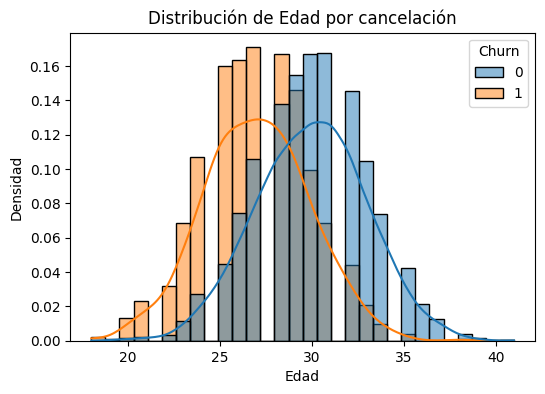

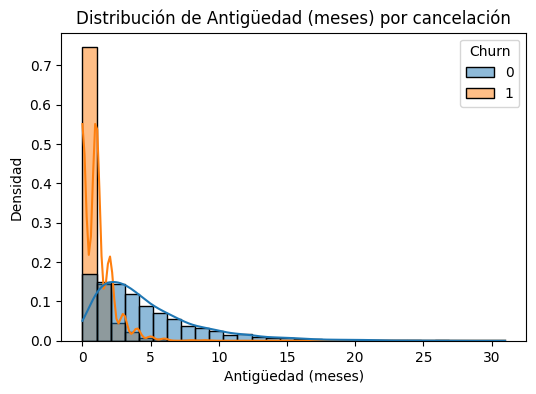

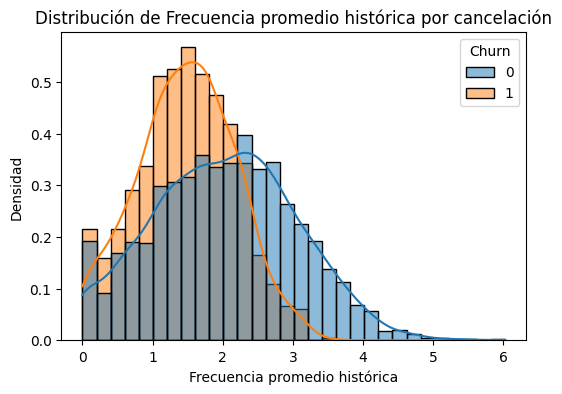

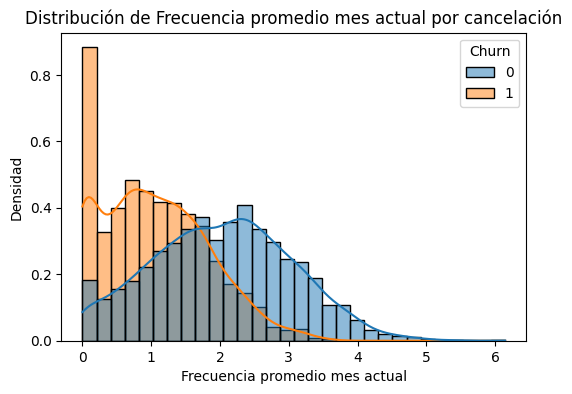

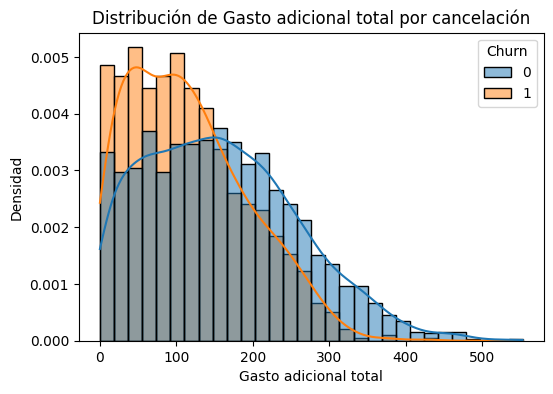

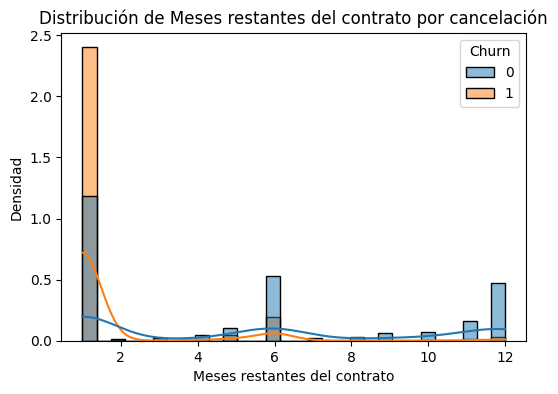

In [7]:
features = [
    'Age',
    'Lifetime',
    'Avg_class_frequency_total',
    'Avg_class_frequency_current_month',
    'Avg_additional_charges_total',
    'Month_to_end_contract'
]

for feature in features:
    plt.figure(figsize=(6, 4))
    sns.histplot(
        data=df,
        x=feature,
        hue='Churn',
        bins=30,
        kde=True,
        stat='density',
        common_norm=False
    )
    plt.title(f'Distribución de {feature_labels[feature]} por cancelación')
    plt.xlabel(feature_labels[feature])
    plt.ylabel('Densidad')
    plt.show()

### Matriz de correlación

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien hecho! Estas gráficas son muy claras para mostrar las diferencias entre cada variable de tu dataset
</div>

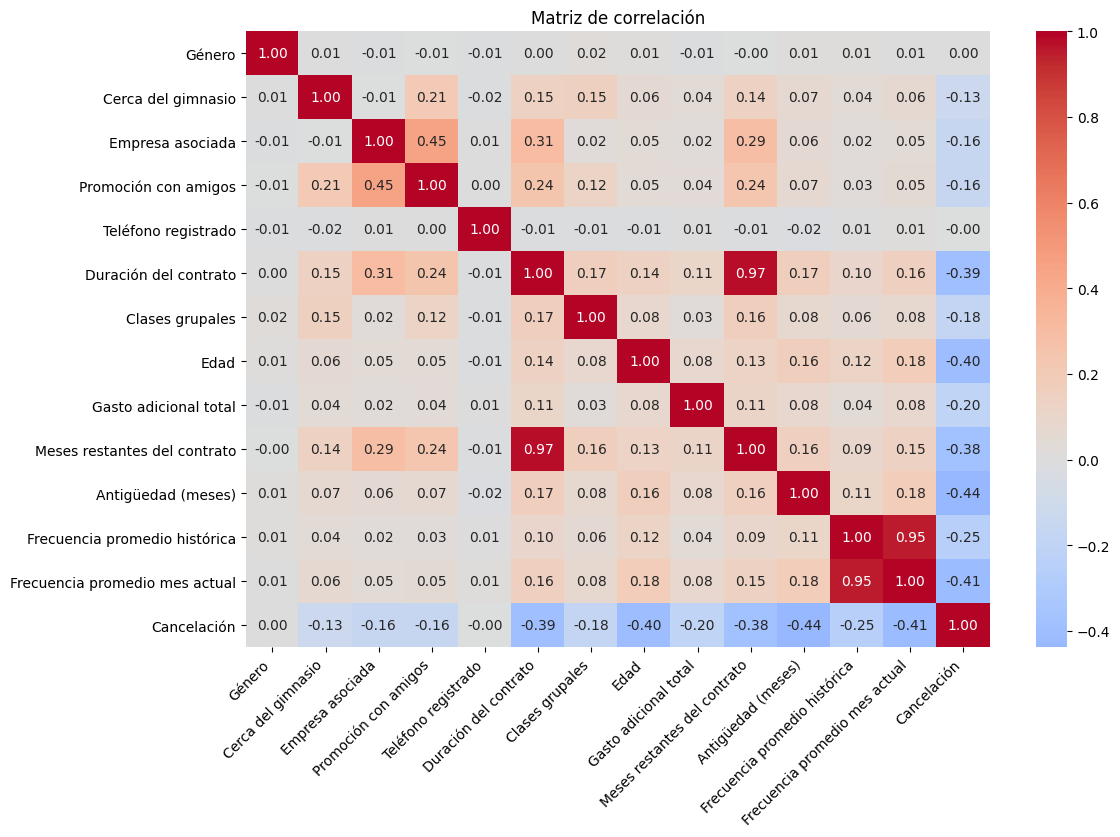

In [8]:
# Matriz de correlación
corr_matrix = df.corr()

# Renombrar solo para visualización
corr_matrix_renamed = corr_matrix.rename(
    index=feature_labels,
    columns=feature_labels
)

plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix_renamed,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0
)
plt.title('Matriz de correlación')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien mostrada la matriz de correlación! Solo ten en cuenta que no siempre correlación significa causalidad, puede que en algunos casos tengas variables altamente correlacionadas pero no necesariamente son causa una de la otra

## Paso 3. Modelos de predicción de cancelación

### Preparación de variables

In [9]:
X = df.drop('Churn', axis=1)
y = df['Churn']

### División de datos en conjuntos de entrenamiento y validación

In [10]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

#### Verificación de proporciones de la variable objetivo

In [11]:
y.value_counts(normalize=True)
y_train.value_counts(normalize=True)
y_valid.value_counts(normalize=True)

0    0.735
1    0.265
Name: Churn, dtype: float64

### Modelo 1: Regresión logística

In [12]:
log_model = LogisticRegression(
    random_state=42,
    max_iter=1000
)

log_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

### Evaluación del modelo de regresión logística

In [13]:
y_pred_log = log_model.predict(X_valid)

accuracy_log = accuracy_score(y_valid, y_pred_log)
precision_log = precision_score(y_valid, y_pred_log)
recall_log = recall_score(y_valid, y_pred_log)

accuracy_log, precision_log, recall_log

(0.92375, 0.8756218905472637, 0.8301886792452831)

### Modelo 2: Random Forest

In [14]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Evaluación del modelo Random Forest

In [15]:
y_pred_rf = rf_model.predict(X_valid)

accuracy_rf = accuracy_score(y_valid, y_pred_rf)
precision_rf = precision_score(y_valid, y_pred_rf)
recall_rf = recall_score(y_valid, y_pred_rf)

accuracy_rf, precision_rf, recall_rf

(0.9275, 0.885, 0.8349056603773585)

### Comparación de modelos

Ambos modelos fueron evaluados utilizando las métricas de exactitud, precisión y recall. 
Aunque los resultados son similares, el modelo de Random Forest mostró un desempeño ligeramente superior en todas las métricas, incluyendo el recall, que es especialmente importante para identificar clientes con riesgo de cancelación.

Por esta razón, el modelo de Random Forest se considera más adecuado para la predicción de la cancelación de clientes en este caso.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo! Obtuviste resultados muy buenos en el entrenamiento de tus modelos y realizaste el análisis adecuado a partir de los mismos
</div>

## Paso 4. Segmentación de clientes (Clustering)

### Preparación de los datos para clustering

In [16]:
X_clustering = df.drop('Churn', axis=1)

### Estandarización de las variables

In [17]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clustering)

### Análisis jerárquico y dendrograma

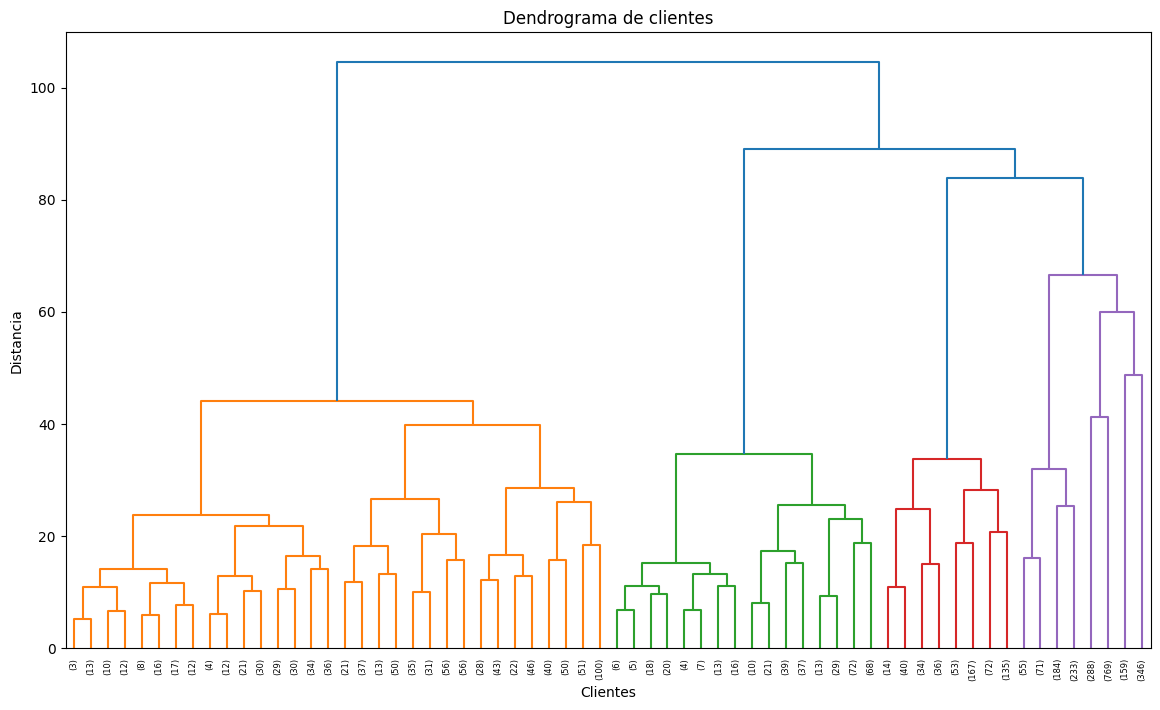

In [18]:
linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(14, 8))
dendrogram(linked, truncate_mode='level', p=5)
plt.title('Dendrograma de clientes')
plt.xlabel('Clientes')
plt.ylabel('Distancia')
plt.show()

### Clustering con K-means

In [19]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df['cluster'] = clusters

### Valores medios de las características por clúster

In [20]:
cluster_means = df.groupby('cluster').mean().round(2)
cluster_means

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster,,,,,,,,,,,,,,
0,0.50,0.95,0.83,1.00,1.0,3.10,0.45,29.10,141.77,2.89,3.77,1.77,1.67,0.25
1,0.55,0.85,0.26,0.05,1.0,2.61,0.44,30.01,159.77,2.42,4.78,2.75,2.73,0.09
2,0.50,0.94,0.74,0.48,1.0,11.85,0.55,29.91,163.51,10.81,4.68,2.01,2.00,0.02
3,0.49,0.72,0.30,0.02,1.0,1.91,0.28,28.08,129.50,1.82,2.20,1.23,0.97,0.57
4,0.52,0.86,0.47,0.31,0.0,4.78,0.43,29.30,144.21,4.47,3.94,1.85,1.72,0.27


### Distribuciones de variables por clúster

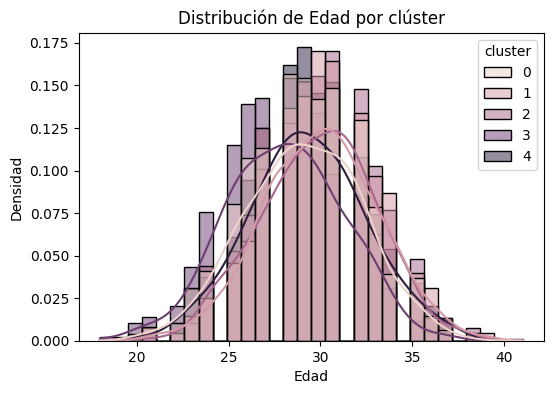

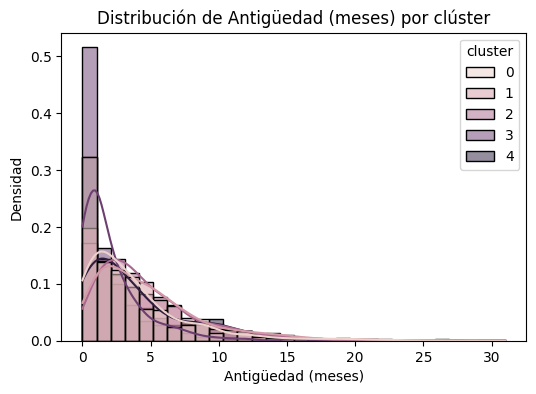

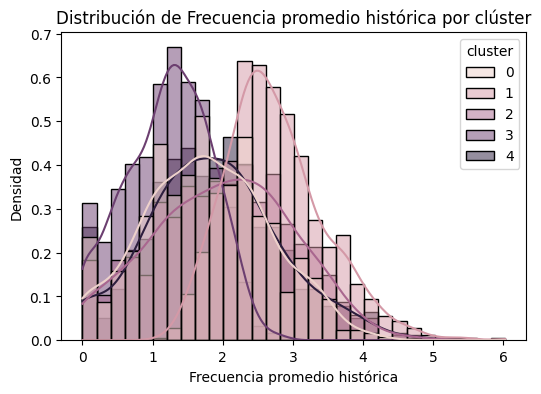

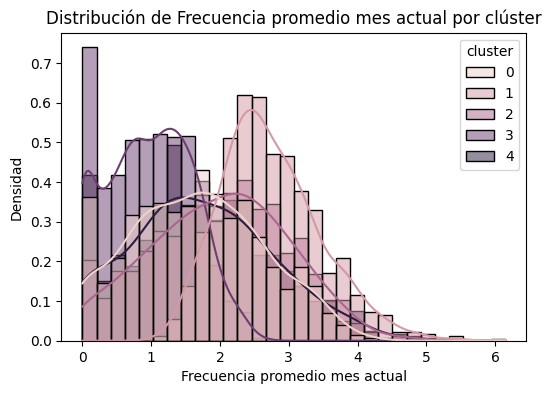

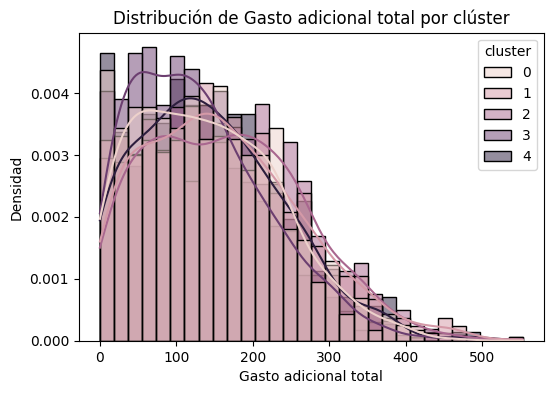

In [21]:
features = [
    'Age',
    'Lifetime',
    'Avg_class_frequency_total',
    'Avg_class_frequency_current_month',
    'Avg_additional_charges_total'
]

for feature in features:
    plt.figure(figsize=(6, 4))
    sns.histplot(
        data=df,
        x=feature,
        hue='cluster',
        bins=30,
        kde=True,
        stat='density',
        common_norm=False
    )
    plt.title(f'Distribución de {feature_labels[feature]} por clúster')
    plt.xlabel(feature_labels[feature])
    plt.ylabel('Densidad')
    plt.show()

### Tasa de cancelación por clúster

In [22]:
df.groupby('cluster')['Churn'].mean().round(3)

cluster
0    0.246
1    0.090
2    0.022
3    0.573
4    0.267
Name: Churn, dtype: float64

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Bien hecho! Se nota claramente la segmentación entre los diferentes grupos ya que tienen un churn rate diferente
</div>

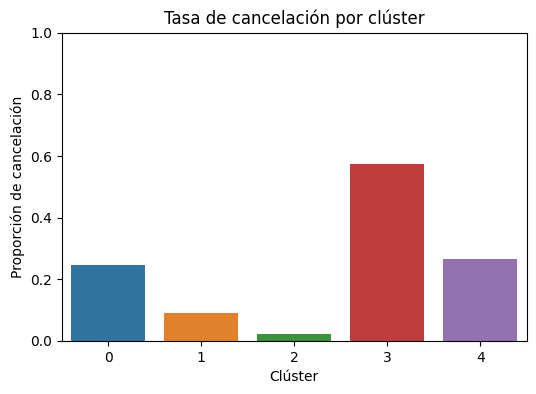

In [23]:
churn_by_cluster = df.groupby('cluster')['Churn'].mean()

plt.figure(figsize=(6, 4))
sns.barplot(
    x=churn_by_cluster.index,
    y=churn_by_cluster.values
)

plt.title('Tasa de cancelación por clúster')
plt.xlabel('Clúster')
plt.ylabel('Proporción de cancelación')
plt.ylim(0, 1)
plt.show()

### Interpretación de los clústeres y análisis de la tasa de cancelación

El análisis de clustering permitió identificar cinco grupos de clientes con perfiles claramente diferenciados en términos de comportamiento y riesgo de cancelación. Los clústeres muestran diferencias significativas en sus tasas de cancelación, lo que evidencia que el nivel de compromiso del cliente con el gimnasio varía de manera considerable entre los distintos grupos.

El clúster 3 es el más propenso a cancelar su membresía, con una tasa de cancelación cercana al 57%. Este grupo se caracteriza por una baja frecuencia de visitas, contratos de corta duración y una menor interacción con servicios adicionales, lo que refleja un bajo nivel de involucramiento con el gimnasio.

En contraste, los clústeres 2 y 1 presentan las tasas de cancelación más bajas, aproximadamente del 2% y 9%, respectivamente. Estos grupos corresponden a clientes más leales, con una mayor frecuencia de uso, contratos de mayor duración y un gasto adicional más elevado, lo que sugiere hábitos de asistencia consolidados y un alto nivel de fidelización.

Por su parte, los clústeres 0 y 4 muestran tasas de cancelación intermedias, cercanas al 25–27%. Estos grupos presentan niveles moderados de frecuencia y antigüedad, por lo que representan un riesgo medio de abandono y constituyen un objetivo clave para la implementación de estrategias de retención tempranas.

## Paso 5. Conclusiones y recomendaciones

### Conclusiones

El análisis de los datos muestra que la cancelación de clientes en Model Fitness está estrechamente relacionada con el nivel de uso del gimnasio y el grado de compromiso del cliente. Los clientes con mayor frecuencia de visitas, contratos de mayor duración y mayor gasto en servicios adicionales presentan una probabilidad significativamente menor de cancelar su membresía.

El modelo predictivo de Random Forest demostró ser el más adecuado para identificar clientes en riesgo de cancelación, mientras que la segmentación mediante clustering permitió diferenciar grupos de clientes con distintos niveles de lealtad y propensión al abandono.

Estos resultados confirman que el comportamiento de uso y la duración del contrato son factores clave para diseñar estrategias efectivas de retención.

### Recomendaciones

1. **Implementar acciones de retención tempranas para clientes con baja actividad**, como recordatorios personalizados, promociones dirigidas o seguimiento cuando se detecte una disminución en la frecuencia de visitas.

2. **Fomentar contratos de mayor duración**, ofreciendo incentivos o beneficios adicionales, ya que los clientes con contratos más largos presentan menores tasas de cancelación.

3. **Promover la participación en actividades grupales y servicios adicionales**, debido a que estos clientes muestran un mayor nivel de compromiso y lealtad hacia el gimnasio.

4. **Utilizar el modelo predictivo para identificar clientes con alto riesgo de cancelación**, permitiendo aplicar campañas preventivas y personalizadas antes de que se produzca el abandono.

<div class="alert alert-block alert-success">
<b>Comentario general (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo, manejaste muy bien los datos previo al entrenamiento de tus modelos y analizaste muy bien los resultados.
    
Planteaste muy buenas conclusiones en base a los datos de tu análisis, un buen análisis siempre debe venir acompañado de recomendaciones que ayuden a la toma de decisiones que en este caso haz planteado sugerencias muy buenas en cuanto a los diferentes tipos de usuarios obtenidos.
    
    
Saludos!
</div>